In [1]:
#!pip install pandas
#!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

D:\shanu_user\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\shanu_user\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\shanu_user\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

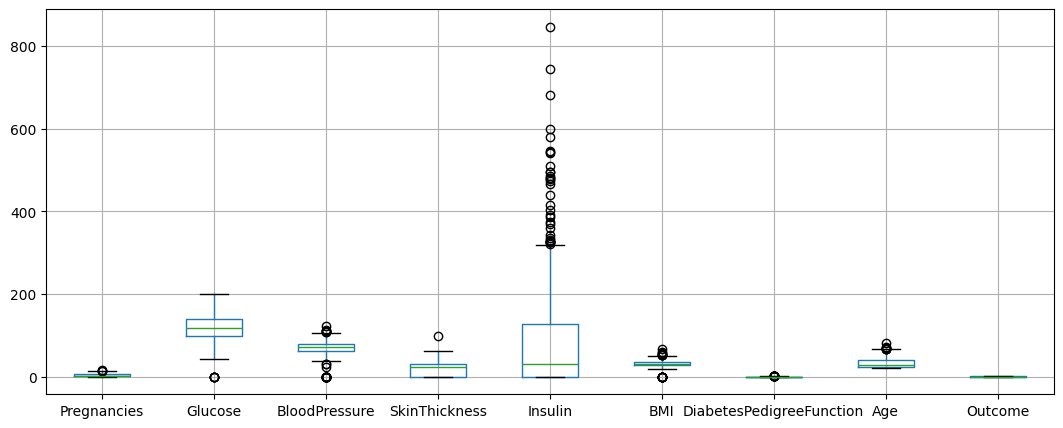

In [9]:
df.boxplot(figsize=(13,5))
plt.show()

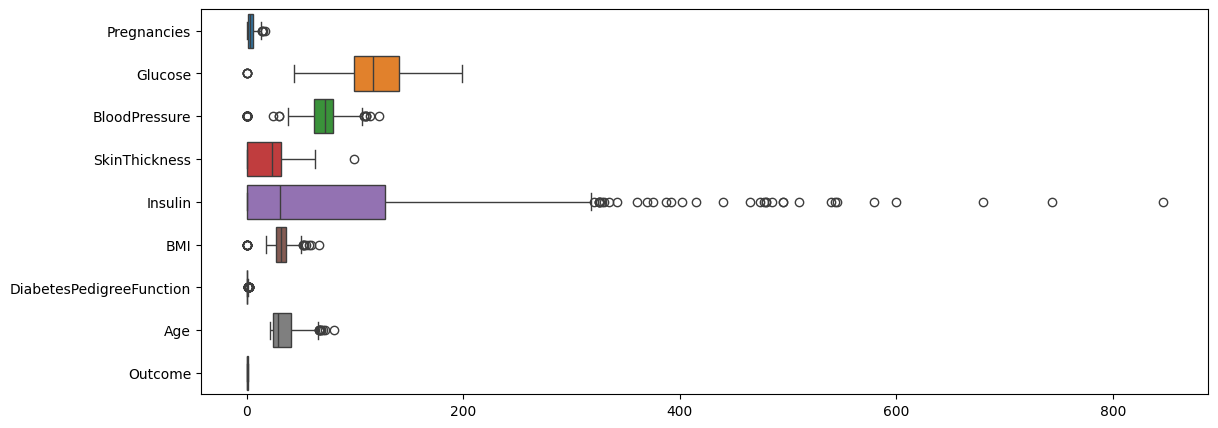

In [10]:
plt.figure(figsize=(13,5))
sns.boxplot(data=df,orient='h')
plt.show()

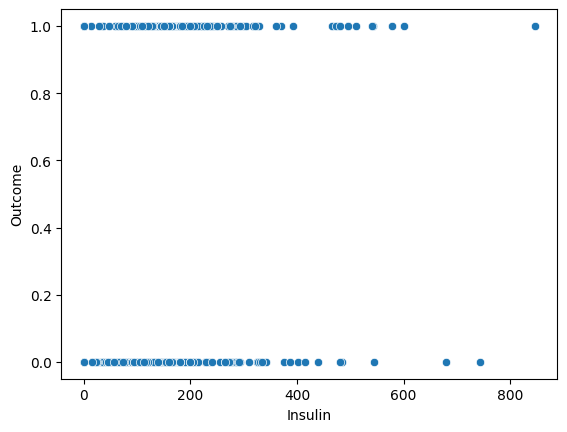

In [11]:
sns.scatterplot(x=df['Insulin'],y=df['Outcome'])
plt.show()

# Replacing 0 with Mean with respective columns

In [12]:
X=df.drop('Outcome',axis=1)

In [13]:
Y=df['Outcome']

In [14]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [15]:
X.replace(to_replace=0,value=X.mean(),inplace=True)

In [16]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


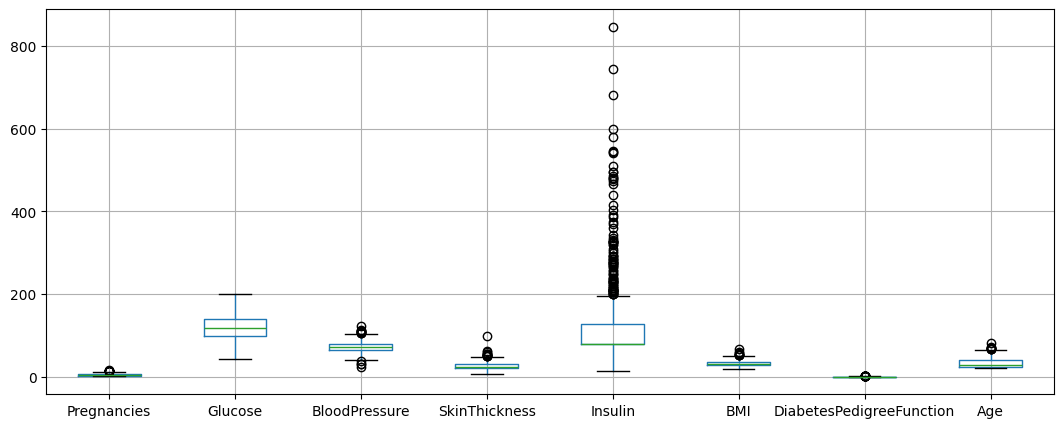

In [17]:
X.boxplot(figsize=(13,5))
plt.show()

# Splitting of data for training and testing

In [18]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [19]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=None)

In [22]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
416,1.000000,97.0,68.000000,21.000000,79.799479,27.2,1.095,22
589,3.845052,73.0,69.105469,20.536458,79.799479,21.1,0.342,25
179,5.000000,130.0,82.000000,20.536458,79.799479,39.1,0.956,37
5,5.000000,116.0,74.000000,20.536458,79.799479,25.6,0.201,30
415,3.000000,173.0,84.000000,33.000000,474.000000,35.7,0.258,22
...,...,...,...,...,...,...,...,...
40,3.000000,180.0,64.000000,25.000000,70.000000,34.0,0.271,26
748,3.000000,187.0,70.000000,22.000000,200.000000,36.4,0.408,36
655,2.000000,155.0,52.000000,27.000000,540.000000,38.7,0.240,25
651,1.000000,117.0,60.000000,23.000000,106.000000,33.8,0.466,27


In [23]:
Y_train

416    0
589    0
179    1
5      0
415    1
      ..
40     0
748    1
655    1
651    0
274    0
Name: Outcome, Length: 576, dtype: int64

# Standard Scaler

In [24]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [25]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [26]:
X_train_std

array([[-1.13465233, -0.80829228, -0.35117291, ..., -0.77733186,
         1.9439528 , -0.96135804],
       [-0.16945092, -1.58110911, -0.26145736, ..., -1.67557016,
        -0.39786784, -0.71348775],
       [ 0.22237226,  0.25433086,  0.78501271, ...,  0.9749691 ,
         1.51166453,  0.27799342],
       ...,
       [-0.79539618,  1.05934839, -1.64967075, ...,  0.91606823,
        -0.71508657, -0.71348775],
       [-1.13465233, -0.16427826, -1.00042183, ...,  0.19453254,
        -0.01222938, -0.54824089],
       [ 2.93642144, -0.51848597, -0.18886068, ...,  0.25343341,
        -0.6808767 ,  1.51734487]])

# Train our Model

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [28]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [29]:
Y_pred=lr.predict(X_test_std)

In [30]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [31]:
Y_test

364    0
507    0
113    0
609    0
663    1
      ..
590    1
606    1
208    0
457    0
71     0
Name: Outcome, Length: 192, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(Y_test,Y_pred) * 100

78.125

# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [35]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [36]:
Y_pred=dt.predict(X_test_std)

In [37]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [38]:
Y_test

364    0
507    0
113    0
609    0
663    1
      ..
590    1
606    1
208    0
457    0
71     0
Name: Outcome, Length: 192, dtype: int64

In [39]:
accuracy_score(Y_test,Y_pred)

0.6875

# Deep learning

In [40]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(8,8))

In [41]:
mlp.fit(X_train_std,Y_train)

MLPClassifier(hidden_layer_sizes=(8, 8))

In [42]:
Y_pred=mlp.predict(X_test_std)

In [43]:
accuracy_score(Y_test,Y_pred)

0.7604166666666666